![Laptop](https://storage.googleapis.com/kaggle-datasets-images/3510664/6124158/d368409f56a58a51f27a5b4028a94172/dataset-cover.jpg?t=2023-07-12-15-24-13)

## `Column Description`

Company:

Description: The manufacturer or brand of the laptop.
Example: Dell, HP, Lenovo, Apple.

TypeName:

Description: The type or category of the laptop, often indicating its primary use or design.
Example: Gaming, Ultrabook, Convertible, Laptop.

Inches:

Description: The diagonal size of the laptop screen, measured in inches.
Example: 15.6, 13.3.

ScreenResolution:

Description: The resolution of the laptop screen, indicating the number of pixels in each dimension.
Example: 1920x1080 (Full HD), 2560x1440 (Quad HD), 3840x2160 (4K).

Cpu:

Description: The central processing unit of the laptop, which is the primary processor.
Example: Intel Core i5-9300H, AMD Ryzen 7 4800H.

Ram:

Description: The amount of Random Access Memory (RAM) available in the laptop, typically measured in gigabytes (GB).
Example: 8GB, 16GB, 32GB.

Memory:

Description: The storage capacity of the laptop's hard drive or solid-state drive, measured in gigabytes (GB) or terabytes (TB).
Example: 512GB SSD, 1TB HDD.

Gpu:

Description: The graphics processing unit or graphics card used in the laptop, which affects its ability to handle graphics and video processing.
Example: NVIDIA GeForce GTX 1650, Intel Integrated Graphics.

OpSys:

Description: The operating system installed on the laptop.
Example: Windows 10, macOS, Ubuntu Linux.

Weight:

Description: The weight of the laptop, typically measured in kilograms (kg) or pounds (lbs).
Example: 2.3 kg, 5.5 lbs.

Price:

Description: The cost of the laptop, typically in the currency of the dataset’s region (e.g., USD, EUR).
Example: 99999,120000.`

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline
import plotly.express as px

In [154]:
df=pd.read_csv('/content/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [155]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [156]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [157]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [159]:
df.duplicated().sum()

29

In [160]:
df[df.duplicated()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [161]:
cat_var=df.select_dtypes('O').columns
cat_var

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [162]:
int_var=df.select_dtypes('number')
int_var.columns

Index(['Inches', 'Price'], dtype='object')

In [163]:
def uniquevalues(col):
  print(f'Details of perticular columns {col} is :{df[col].unique()}')

def value_counts(col):
  print(f'Details of perticular columns {col} is :{df[col].value_counts()}')

for col in df.columns:
  uniquevalues(col)
  print('--'*100)

Details of perticular columns Company is :['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Details of perticular columns TypeName is :['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Details of perticular columns Inches is :[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
------------------------------------------------------------------------------------------------------------------------------------------

In [164]:
for col in df.columns:
  value_counts(col)
  print('--'*100)

Details of perticular columns Company is :Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Details of perticular columns TypeName is :TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------------

## `so on observation we can see that if we remove "GB" from RAM,i can make it as an integer value then after,now same goes with Memory as well as Weight,for Weight i can classify it as floating variable using the str.replace() as shown ↓ `

In [165]:
df['Ram']=df['Ram'].str.split('GB').str.get(0).astype(int)

In [166]:
df['Weight']=df['Weight'].str.split('kg').str.get(0).astype(float)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


## `EDA`

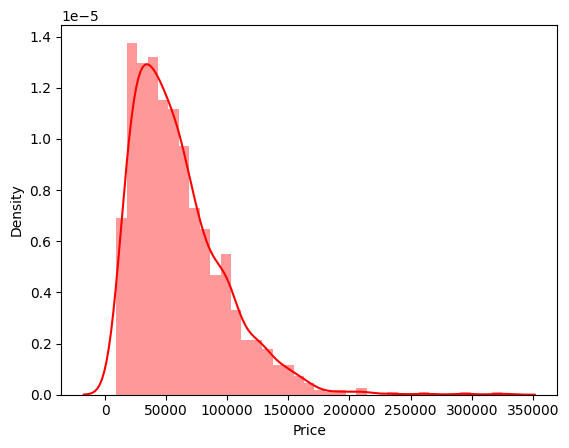

In [168]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(df['Price'],color='red')
plt.show()

In [169]:
df['Price'].min()

9270.72

In [170]:
temp_df=df['Company'].value_counts().reset_index()
temp_df

,Company,count
0,Dell,297
1,Lenovo,297
2,HP,274
3,Asus,158
4,Acer,103
5,MSI,54
6,Toshiba,48
7,Apple,21
8,Samsung,9
9,Razer,7


In [171]:
fig = px.bar(x=temp_df['Company'],y=temp_df['count'],color=temp_df['Company'],text_auto=True)
fig.update_layout(title='barplot of laptop company',xaxis_title='comapany',yaxis_title='frequency')
fig.show()

In [172]:
temp_df=df['TypeName'].value_counts().reset_index()
temp_df

,TypeName,count
0,Notebook,727
1,Gaming,205
2,Ultrabook,196
3,2 in 1 Convertible,121
4,Workstation,29
5,Netbook,25


In [173]:
fig = px.bar(x=temp_df['TypeName'],y=temp_df['count'],color=temp_df['TypeName'],text_auto=True)
fig.update_layout(title='barplot of laptop company',xaxis_title='laptopTypeName',yaxis_title='frequency')
fig.show()

In [174]:
temp_df=df['OpSys'].value_counts().reset_index()
temp_df

,OpSys,count
0,Windows 10,1072
1,No OS,66
2,Linux,62
3,Windows 7,45
4,Chrome OS,27
5,macOS,13
6,Mac OS X,8
7,Windows 10 S,8
8,Android,2


In [175]:
fig = px.bar(x=temp_df['OpSys'],y=temp_df['count'],color=temp_df['OpSys'],text_auto=True)
fig.update_layout(title='barplot of laptop company',xaxis_title='laptop Os name',yaxis_title='frequency')
fig.show()

In [176]:
df[df['OpSys']=='Linux']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
36,Acer,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.1,19553.7600
40,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.0,20725.9200
42,Asus,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 940MX,Linux,2.3,27864.9072
59,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.0,22111.2000
69,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,Nvidia GeForce GTX 1050 Ti,Linux,3.0,50562.7200
...,...,...,...,...,...,...,...,...,...,...,...
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.3,42943.1472
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.4,15397.9200
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.3,42943.1472
1291,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.4,15397.9200


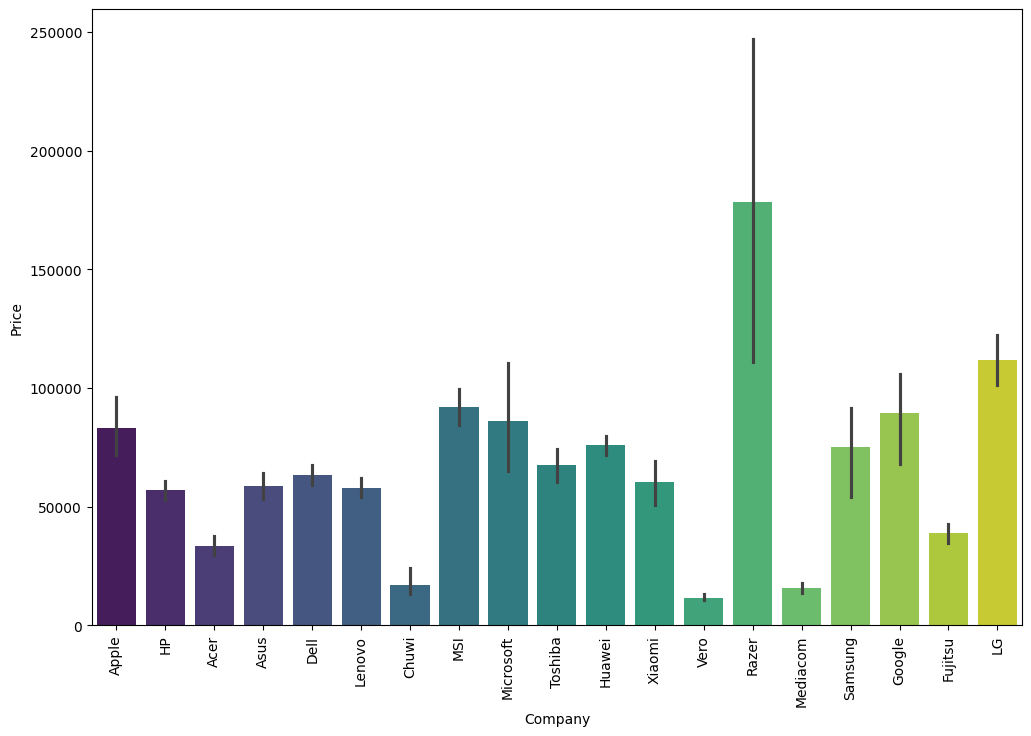

In [177]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['Company'],y=df['Price'],palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [178]:
df[df['Company']=='Razer']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.72
647,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,138474.72
778,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,154458.72
816,Razer,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.29,95850.72
830,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,292986.72
1117,Razer,Ultrabook,12.5,Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.25,54825.12
1231,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,186426.72


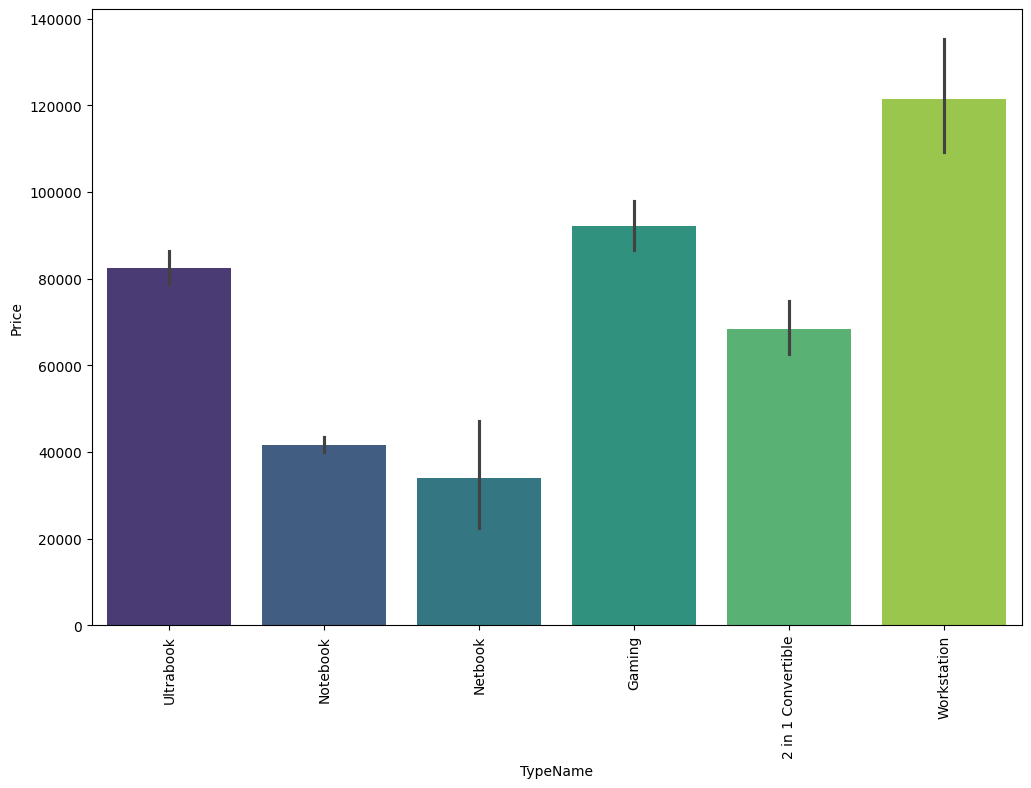

In [179]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['TypeName'],y=df['Price'],palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [180]:
px.scatter(df,x='Inches',y='Price',color='Company',size='Price',size_max=20,title='scatterplot of iches and price in laptops')

##`For the Screen Resolution column we have many types of Screen Resolutions out there as shown Touch Screen and Normal and IPS Panel are the 3 parts on basis of which we can segregate the things`

In [181]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [182]:
df['Has_Touchscreen']=df['ScreenResolution'].str.contains('Touchscreen').astype(int)

In [183]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Has_Touchscreen'],
      dtype='object')

In [184]:
df=df[['Company', 'TypeName', 'Inches', 'ScreenResolution','Has_Touchscreen', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]

In [185]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Has_Touchscreen,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,0,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,0,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,0,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,0,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,0,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [186]:
df['Has_IPS_Panel']=df['ScreenResolution'].str.contains('IPS Panel').astype(int)

In [187]:
df=df[['Company', 'TypeName', 'Inches', 'ScreenResolution','Has_Touchscreen','Has_IPS_Panel', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]

<Axes: xlabel='Has_Touchscreen', ylabel='count'>

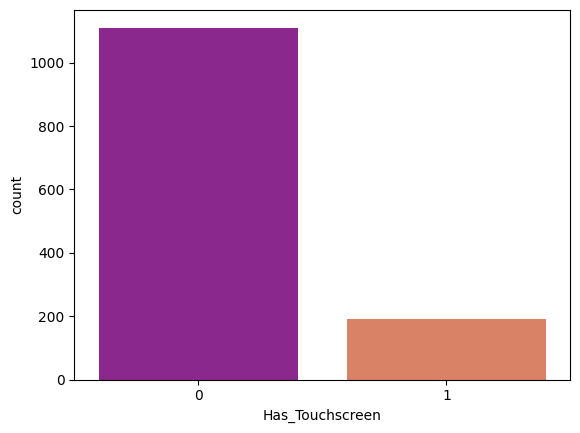

In [188]:
sns.countplot(df,x='Has_Touchscreen',palette='plasma')

<Axes: xlabel='Has_Touchscreen', ylabel='Price'>

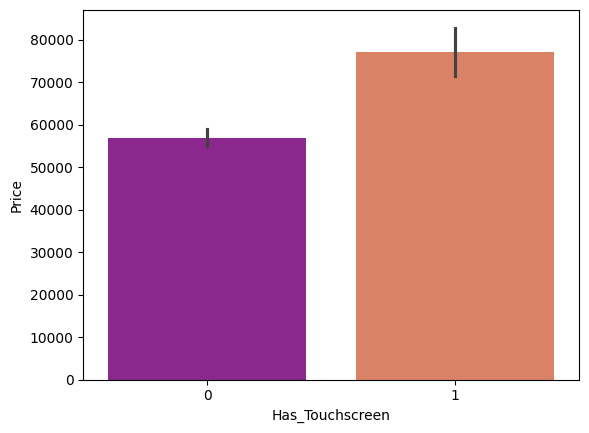

In [189]:
sns.barplot(df,x='Has_Touchscreen',y='Price',palette='plasma')

In [190]:
df['Price'].corr(df['Has_Touchscreen'])

0.1912264637867219

In [191]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Has_Touchscreen,Has_IPS_Panel,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,0,1,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,0,0,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,0,0,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,0,1,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,0,1,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


<Axes: xlabel='Has_IPS_Panel', ylabel='count'>

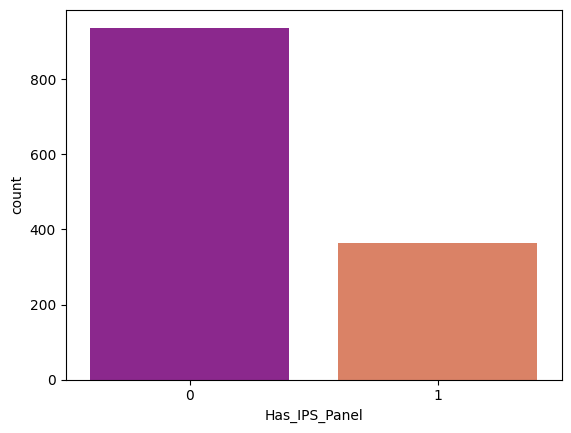

In [192]:
sns.countplot(df,x='Has_IPS_Panel',palette='plasma')

<Axes: xlabel='Has_IPS_Panel', ylabel='Price'>

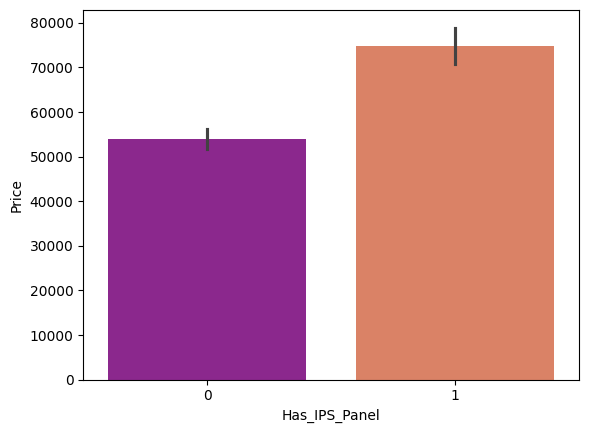

In [193]:
sns.barplot(df,x='Has_IPS_Panel',y='Price',palette='plasma')

In [194]:
df['Price'].corr(df['Has_IPS_Panel'])

0.25220761965308836

In [195]:
x=df['ScreenResolution'].str.split('x',n=2,expand=True)
x[0]

,0
0,IPS Panel Retina Display 2560
1,1440
2,Full HD 1920
3,IPS Panel Retina Display 2880
4,IPS Panel Retina Display 2560
...,...
1298,IPS Panel Full HD / Touchscreen 1920
1299,IPS Panel Quad HD+ / Touchscreen 3200
1300,1366
1301,1366


In [196]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is height we need to do
# some feature engineering on the width col
df['Display_width']=x[0]
df['Display_Height']=x[1]

In [197]:
df['Display_Height'].unique()

array(['1600', '900', '1080', '1800', '768', '1440', '1200', '1504',
       '2160', '1824'], dtype=object)

In [198]:
#So basically from that whole text of the X_res col,we need to
#extract the digits from it,but the problem is the numbers are scattered
#in some cases
df['Display_width']=df['Display_width'].str.split(' ').str.get(-1)

In [199]:
df['Display_width']=df['Display_width'].astype(int)
df['Display_Height']=df['Display_Height'].astype(int)

In [200]:
df=df[['Company', 'TypeName', 'Inches', 'ScreenResolution','Has_Touchscreen','Has_IPS_Panel','Display_width','Display_Height', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]

In [201]:
df['Price'].corr(df['Display_width'])

0.5565293287169808

In [202]:
df['Price'].corr(df['Display_Height'])

0.552809219817506

In [203]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Has_Touchscreen,Has_IPS_Panel,Display_width,Display_Height,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,0,1,2560,1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,0,0,1440,900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,0,0,1920,1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,0,1,2880,1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,0,1,2560,1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Has_Touchscreen   1303 non-null   int64  
 5   Has_IPS_Panel     1303 non-null   int64  
 6   Display_width     1303 non-null   int64  
 7   Display_Height    1303 non-null   int64  
 8   Cpu               1303 non-null   object 
 9   Ram               1303 non-null   int64  
 10  Memory            1303 non-null   object 
 11  Gpu               1303 non-null   object 
 12  OpSys             1303 non-null   object 
 13  Weight            1303 non-null   float64
 14  Price             1303 non-null   float64
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [205]:
df['cpu_name']=df['Cpu'].str.split(' ').str[:3].str.join(' ')

In [206]:
# df['Cpu_brand']=df['Cpu'].str.split(' ').str.get(0)

In [207]:
# df['Cpu_generation']=df['Cpu'].str.split('re').str.get(1).str.split(' ').str.get(1)

In [208]:
df['cpu_speed']=df['Cpu'].str.split(' ').str.get(-1).str.replace('GHz','').astype('float')

In [209]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Has_Touchscreen,Has_IPS_Panel,Display_width,Display_Height,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,cpu_speed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,0,1,2560,1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,1440x900,0,0,1440,900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,0,0,1920,1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,0,1,2880,1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,0,1,2560,1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1


In [210]:
# df['Memory']=df['Memory'].str.split('GB').str.get(0).str.split('TB').str.get(0)

##`From the correlation plot, we observed that as the width and height are increasing, the price of the laptop is also increasing, indicating that width and height are positively correlated. They provide significant information, which is why I split the Resolution column into width and height columns, respectively`

## `So to improve the analysis, we can create a new column named PPI (pixels per inch). From the correlation plot, we observed that width and height are highly collinear. To reduce collinearity, we can combine them with the Inches column, which has less collinearity. The formula to calculate PPI (pixels per inch) is as follows:`

In [211]:
df['PPI'] = np.sqrt(df['Display_width']**2 +df['Display_Height']**2) / df['Inches']

In [212]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Has_Touchscreen,Has_IPS_Panel,Display_width,Display_Height,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,cpu_speed,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,0,1,2560,1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,226.983005
1,Apple,Ultrabook,13.3,1440x900,0,0,1440,900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,0,0,1920,1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,2.5,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,0,1,2880,1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,0,1,2560,1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1,226.983005


In [213]:
temp_df=df.select_dtypes('number')

<Axes: >

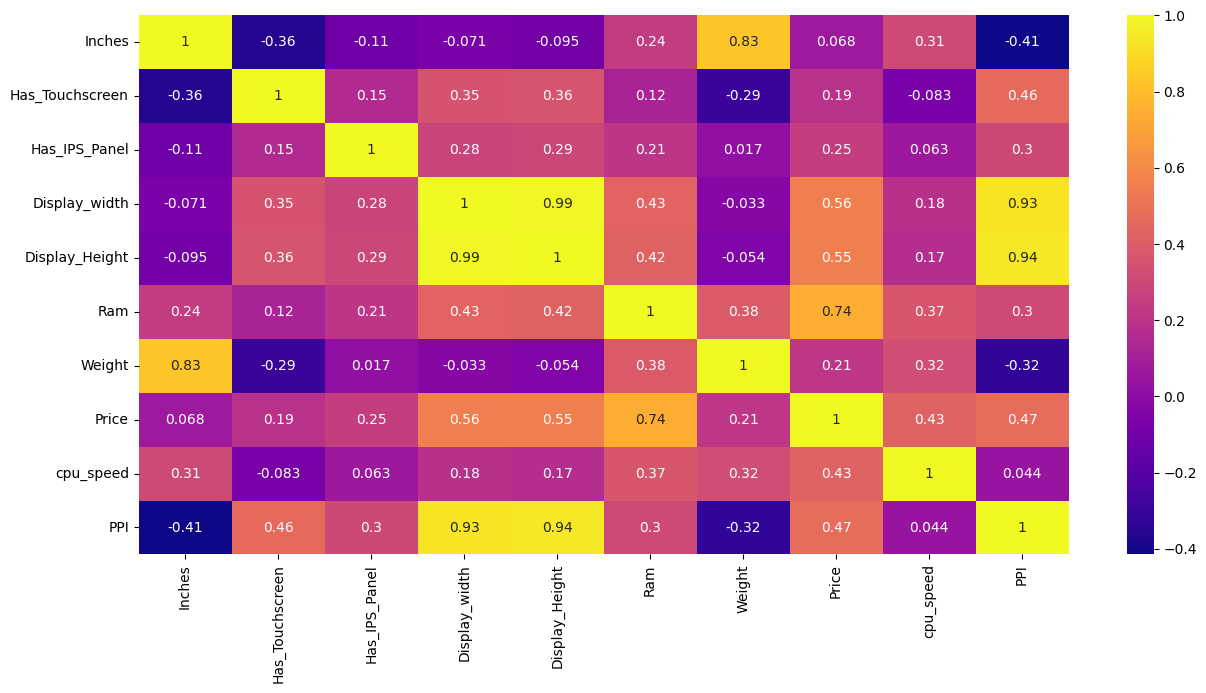

In [214]:
plt.figure(figsize=(15,7))
sns.heatmap(temp_df.corr(),annot=True,cmap='plasma')

In [215]:
temp_df.corr()['Price']

,Price
Inches,0.068197
Has_Touchscreen,0.191226
Has_IPS_Panel,0.252208
Display_width,0.556529
Display_Height,0.552809
Ram,0.743007
Weight,0.210370
Price,1.000000
cpu_speed,0.430293
PPI,0.473487


In [216]:
df.drop(columns=['ScreenResolution','Cpu','Inches'],inplace=True,axis=1)

In [217]:
df.head()

,Company,TypeName,Has_Touchscreen,Has_IPS_Panel,Display_width,Display_Height,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,cpu_speed,PPI
0,Apple,Ultrabook,0,1,2560,1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,226.983005
1,Apple,Ultrabook,0,0,1440,900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,127.677940
2,HP,Notebook,0,0,1920,1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,2.5,141.211998
3,Apple,Ultrabook,0,1,2880,1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7,220.534624
4,Apple,Ultrabook,0,1,2560,1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1,226.983005


`Most common processors are made by intel right,so we will be clustering their `processors` into different categories like `i5,i7,other`,now other means the processors of intel which do not have i3,i5 or i7 attached to it,they're completely different so that's the reason i will clutter them into `other` and other category is `AMD` which is a different category in whole**`

`**So if we observe we need to extract the first 3 words of the CPU column,as the first 3 words of every row under the CPU col is the type of the CPU,so we will be using them as shown ↓`

In [218]:
df['cpu_name'].value_counts()

,count
cpu_name,
Intel Core i7,527
Intel Core i5,423
Intel Core i3,136
Intel Celeron Dual,80
Intel Pentium Quad,27
Intel Core M,19
AMD A9-Series 9420,12
Intel Celeron Quad,8
AMD A6-Series 9220,8


In [219]:
def processor(text):
  if text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7':
    return text
  else:
    if text.split()[0]=='Intel':
      return 'Other Intel Processor'
    elif text.split()[0]=='Samsung':
      return 'Samsung'
    else:
      return 'AMD Processor'

In [220]:
df['cpu_name']=df['cpu_name'].apply(processor)

In [221]:
df.head()

,Company,TypeName,Has_Touchscreen,Has_IPS_Panel,Display_width,Display_Height,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,cpu_speed,PPI
0,Apple,Ultrabook,0,1,2560,1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,226.983005
1,Apple,Ultrabook,0,0,1440,900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,127.677940
2,HP,Notebook,0,0,1920,1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,2.5,141.211998
3,Apple,Ultrabook,0,1,2880,1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7,220.534624
4,Apple,Ultrabook,0,1,2560,1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1,226.983005


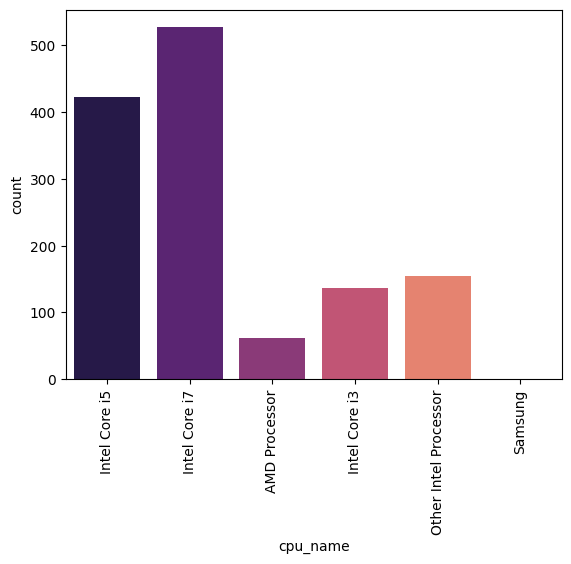

In [222]:
sns.countplot(df,x='cpu_name',palette='magma')
plt.xticks(rotation=90)
plt.show()

In [223]:
temp_df=df['cpu_name'].value_counts().reset_index()
temp_df

,cpu_name,count
0,Intel Core i7,527
1,Intel Core i5,423
2,Other Intel Processor,154
3,Intel Core i3,136
4,AMD Processor,62
5,Samsung,1


In [224]:
px.bar(temp_df,x='cpu_name',y='count')

##`Analysis on the RAM column`

<Axes: xlabel='Ram', ylabel='count'>

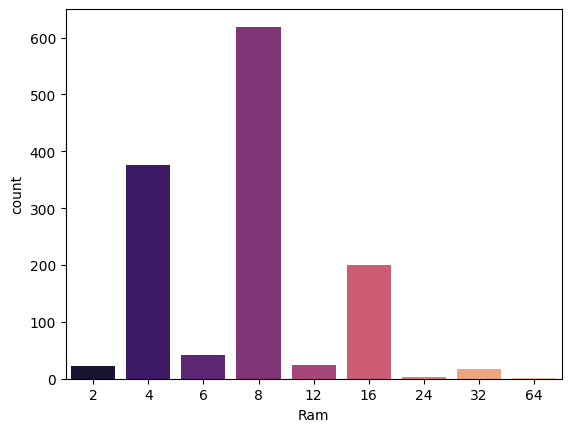

In [225]:
sns.countplot(df,x='Ram',palette='magma')

## `As the Ram increases price also increases in linear`

<Axes: xlabel='Ram', ylabel='Price'>

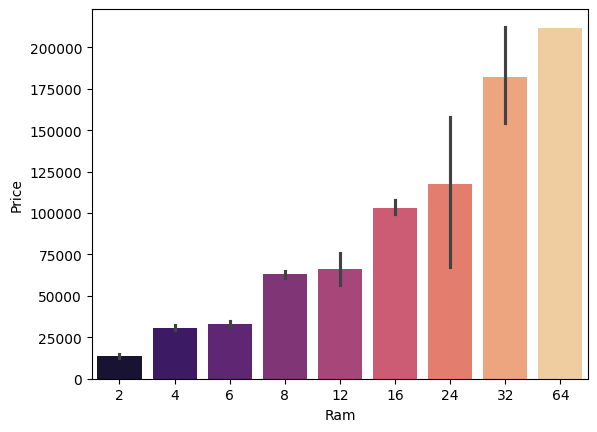

In [226]:
sns.barplot(df,x='Ram',y='Price',palette='magma')

##`We will seperate the `Type` of memory and the value of it,just similar to the one which is done in the previous part**`

`**This part involves things which are needed to be done in steps,so here we do not have the memory as a complete we have it in different dimension as `128GB SSD +  1TB HDD`,so inorder to for it come in a same dimension we need to do some modifications which are done below as shown`

In [227]:
new_df=df['Memory'].str.replace('GB','').str.replace('TB','000').str.split('+',n=1,expand=True)
new_df

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [228]:
df['first']=new_df[0].str.strip()
df['first']

,first
0,128 SSD
1,128 Flash Storage
2,256 SSD
3,512 SSD
4,256 SSD
...,...
1298,128 SSD
1299,512 SSD
1300,64 Flash Storage
1301,1000 HDD


In [229]:
def applychange(value):
  df['Layer'+value]=df['first'].apply(lambda x: 1 if isinstance(x, str) and  value in x  else 0)
list=['SSD','Flash Storage','HDD','Hybrid']
for value in list:
  applychange(value)

In [230]:
df['first']=df['first'].str.replace(r"\D", '', regex=True)

In [231]:
pd.set_option('display.max_columns',None)

In [232]:
df['Second']=new_df[1]

In [233]:
def applychange(value):
  df['Layer2'+value]=df['Second'].apply(lambda x: 1 if isinstance(x,str) and value in x  else 0)
list=['SSD','Flash Storage','HDD','Hybrid']
df['Second']=df['Second'].fillna(0)
for value in list:
  applychange(value)

In [234]:
df['Second']=df['Second'].str.replace(r"\D", '', regex=True)

In [235]:
df.head()

,Company,TypeName,Has_Touchscreen,Has_IPS_Panel,Display_width,Display_Height,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,cpu_speed,PPI,first,LayerSSD,LayerFlash Storage,LayerHDD,LayerHybrid,Second,Layer2SSD,Layer2Flash Storage,Layer2HDD,Layer2Hybrid
0,Apple,Ultrabook,0,1,2560,1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,226.983005,128,1,0,0,0,NaN,0,0,0,0
1,Apple,Ultrabook,0,0,1440,900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,127.677940,128,0,1,0,0,NaN,0,0,0,0
2,HP,Notebook,0,0,1920,1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,2.5,141.211998,256,1,0,0,0,NaN,0,0,0,0
3,Apple,Ultrabook,0,1,2880,1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7,220.534624,512,1,0,0,0,NaN,0,0,0,0
4,Apple,Ultrabook,0,1,2560,1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1,226.983005,256,1,0,0,0,NaN,0,0,0,0


In [236]:
df['Second']=df['Second'].fillna(0)

In [237]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')

In [238]:
df['Layer2HDD'].value_counts()

,count
Layer2HDD,
0,1101
1,202


In [239]:
df.columns

Index(['Company', 'TypeName', 'Has_Touchscreen', 'Has_IPS_Panel',
       'Display_width', 'Display_Height', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'cpu_name', 'cpu_speed', 'PPI', 'first', 'LayerSSD',
       'LayerFlash Storage', 'LayerHDD', 'LayerHybrid', 'Second', 'Layer2SSD',
       'Layer2Flash Storage', 'Layer2HDD', 'Layer2Hybrid'],
      dtype='object')

In [240]:
df['HDD']=(df['first']*df['LayerHDD'])+(df['Second']*df['Layer2HDD'])
df['HDD'].value_counts()

,count
HDD,
0,727
1000,407
500,134
2000,32
32,1
128,1
10000,1


In [241]:
df["SSD"]=(df["first"]*df["LayerSSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["LayerHybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["LayerFlash Storage"]+df["Second"]*df["Layer2Flash Storage"])

In [242]:
df.drop(columns=['first', 'Second', 'LayerHDD', 'LayerSSD', 'LayerHybrid',
       'LayerFlash Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash Storage'],axis=1,inplace=True)

In [243]:
df.drop('Memory' , axis=1,inplace=True)

In [244]:
temp_df=df.select_dtypes('number')

In [245]:
temp_df.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.743007
SSD,0.670799
Display_width,0.556529
Display_Height,0.552809
PPI,0.473487
cpu_speed,0.430293
Has_IPS_Panel,0.252208
Weight,0.210370
Has_Touchscreen,0.191226


## **Based on the correlation we observe that `Hybrid` and `Flash Storage` are almost negligible,so we can simply drop them off,where as `SDD` and `HDD` are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use SDD instead of HDD and vice versa as well**

In [246]:
df.drop(columns=['Hybrid','Flash_Storage'],axis=1,inplace=True)

In [247]:
df.head()

,Company,TypeName,Has_Touchscreen,Has_IPS_Panel,Display_width,Display_Height,Ram,Gpu,OpSys,Weight,Price,cpu_name,cpu_speed,PPI,HDD,SSD
0,Apple,Ultrabook,0,1,2560,1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3,226.983005,0,128
1,Apple,Ultrabook,0,0,1440,900,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8,127.677940,0,0
2,HP,Notebook,0,0,1920,1080,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,2.5,141.211998,0,256
3,Apple,Ultrabook,0,1,2880,1800,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7,220.534624,0,512
4,Apple,Ultrabook,0,1,2560,1600,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1,226.983005,0,256


## `GPU analysis`

## **Here as we are having less data regarding the laptops,its better that we focus on `GPU brands` instead focusing on the values which are present there beside them,we will focus on the `brands`**

In [248]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [249]:
df['Gpu_brand_name']=df['Gpu'].str.split(' ').str.get(0)

<Axes: xlabel='Gpu_brand_name', ylabel='count'>

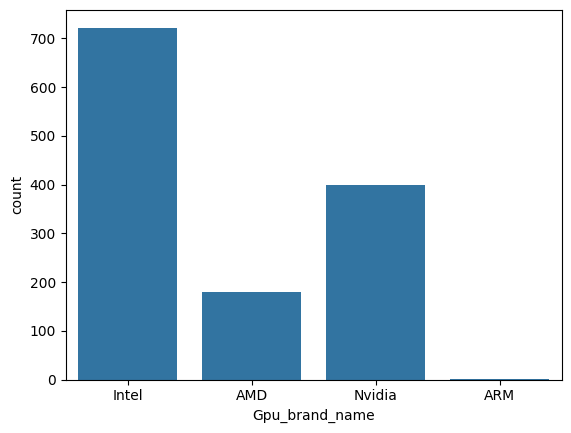

In [250]:
sns.countplot(df,x='Gpu_brand_name')

In [251]:
df['Gpu_brand_name'].value_counts().reset_index()

,Gpu_brand_name,count
0,Intel,722
1,Nvidia,400
2,AMD,180
3,ARM,1


In [252]:
px.bar(x=df['Gpu_brand_name'].value_counts().reset_index()['Gpu_brand_name'],y=df['Gpu_brand_name'].value_counts().reset_index()['count'],color=df['Gpu_brand_name'].value_counts().reset_index()['Gpu_brand_name'],text_auto=True)

<Axes: xlabel='Gpu_brand_name', ylabel='Price'>

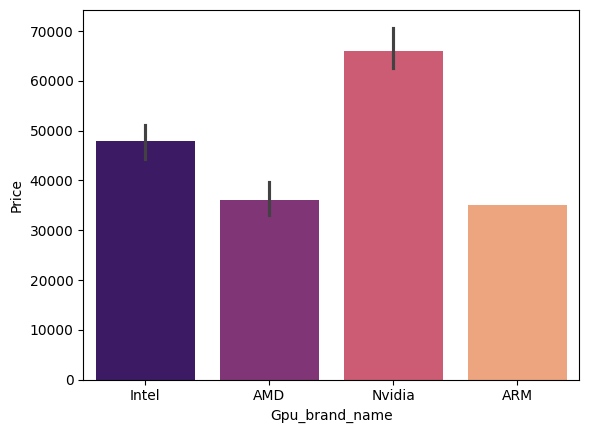

In [253]:
sns.barplot(df,x='Gpu_brand_name',y=df['Price'],estimator=np.median,palette='magma')

##`osSys analysis`

In [254]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [255]:
df['OpSys']=df['OpSys'].str.strip()

In [256]:
df.loc[df['OpSys']=='Mac OS X','OpSys']='macOS'

In [257]:
df.loc[df['OpSys']=='Windows 10 S','OpSys']='Windows 10'

In [258]:
temp_df=df['OpSys'].value_counts().reset_index()

In [259]:
px.bar(temp_df,x='OpSys',y='count',color='OpSys',text_auto=True)

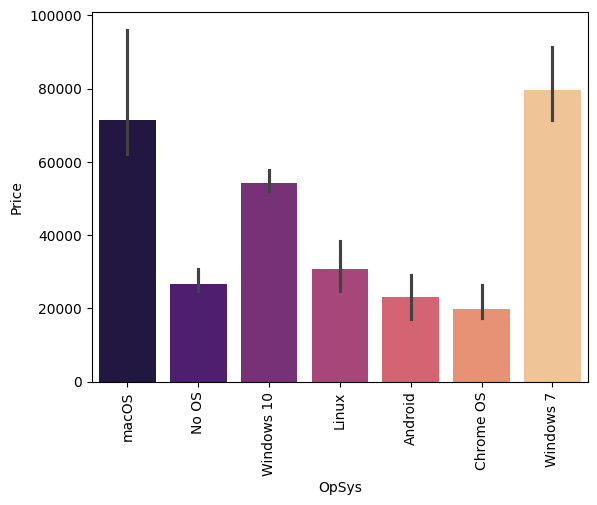

In [260]:
sns.barplot(df,x='OpSys',y=df['Price'],estimator=np.median,palette='magma')
plt.xticks(rotation=90)
plt.show()

In [261]:
def set_category(text):
  if text=='Windows 10' or text=='Windows 7':
    return 'Windows'
  elif text=='macOS':
    return 'Mac'
  else:
    return 'Other'

In [262]:
df['OpSys']=df['OpSys'].apply(set_category)

In [266]:
temp_df=df['OpSys'].value_counts().reset_index()

In [267]:
px.bar(temp_df,x='OpSys',y='count',color='OpSys',text_auto=True)

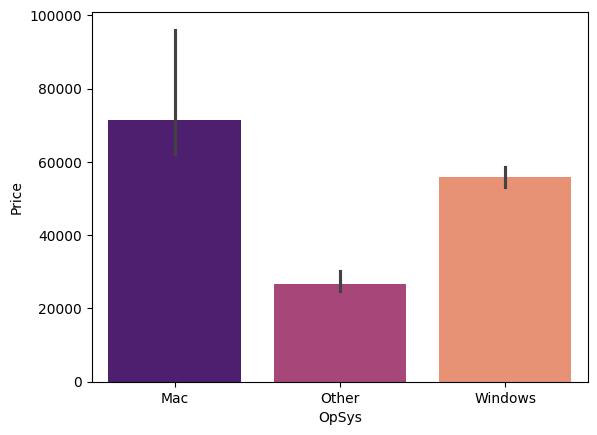

In [268]:
sns.barplot(df,x='OpSys',y=df['Price'],estimator=np.median,palette='magma')
plt.show()

##`weight analysis`

In [271]:
df['Weight'].describe()

,Weight
count,1303.000000
mean,2.038734
std,0.665475
min,0.690000
25%,1.500000
50%,2.040000
75%,2.300000
max,4.700000


In [273]:
df[df['Weight']==4.700000]

,Company,TypeName,Has_Touchscreen,Has_IPS_Panel,Display_width,Display_Height,Ram,Gpu,OpSys,Weight,Price,cpu_name,cpu_speed,PPI,HDD,SSD,Gpu_brand_name
238,Asus,Gaming,0,0,1920,1080,32,Nvidia GeForce GTX 1080,Windows,4.7,207259.2,Intel Core i7,2.9,127.335675,1000,512,Nvidia


<Axes: xlabel='Weight', ylabel='Density'>

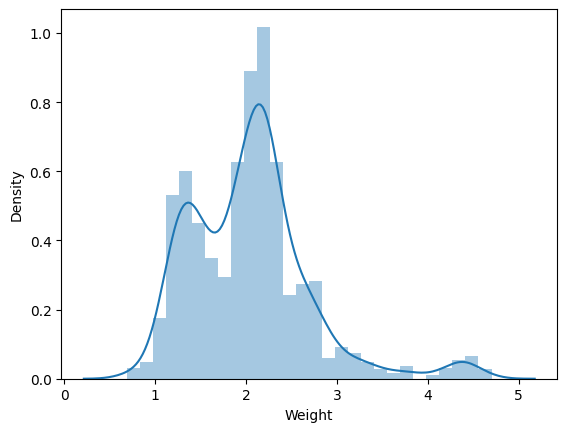

In [277]:
sns.distplot(df['Weight'])

In [275]:
px.histogram(df,x='Weight',nbins=10)

##`Price analysis`

In [279]:
df['Price'].describe()

,Price
count,1303.000000
mean,59870.042910
std,37243.201786
min,9270.720000
25%,31914.720000
50%,52054.560000
75%,79274.246400
max,324954.720000


<Axes: xlabel='Price', ylabel='Density'>

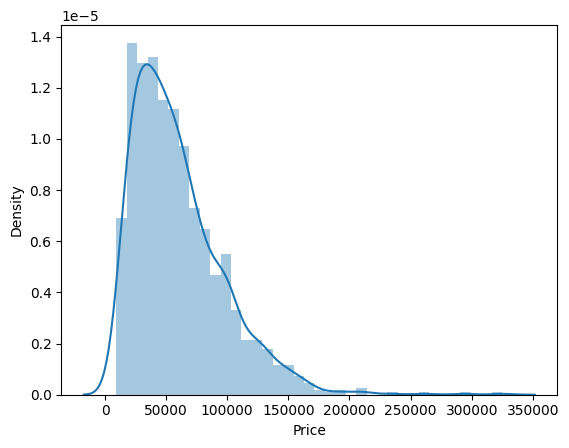

In [278]:
sns.distplot(df['Price'])

In [282]:
df['Price'].skew()

1.5208655681688517

In [281]:
np.log(df['Price']).skew()

-0.17412973375365434

<Axes: xlabel='Price', ylabel='Density'>

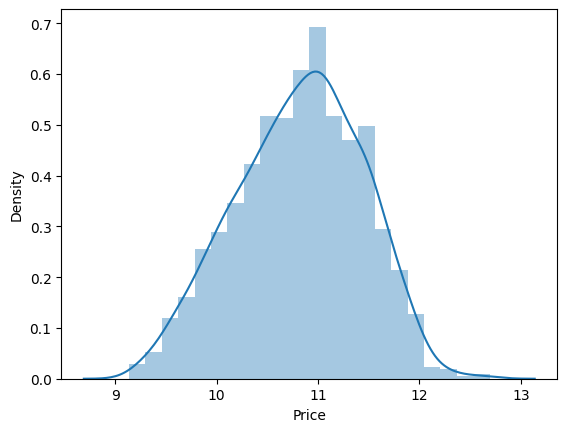

In [280]:
sns.distplot(np.log(df['Price']))

In [283]:
temp_df=df.select_dtypes('number')

In [285]:
temp_df.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.743007
SSD,0.670799
Display_width,0.556529
Display_Height,0.552809
PPI,0.473487
cpu_speed,0.430293
Has_IPS_Panel,0.252208
Weight,0.210370
Has_Touchscreen,0.191226


<Axes: >

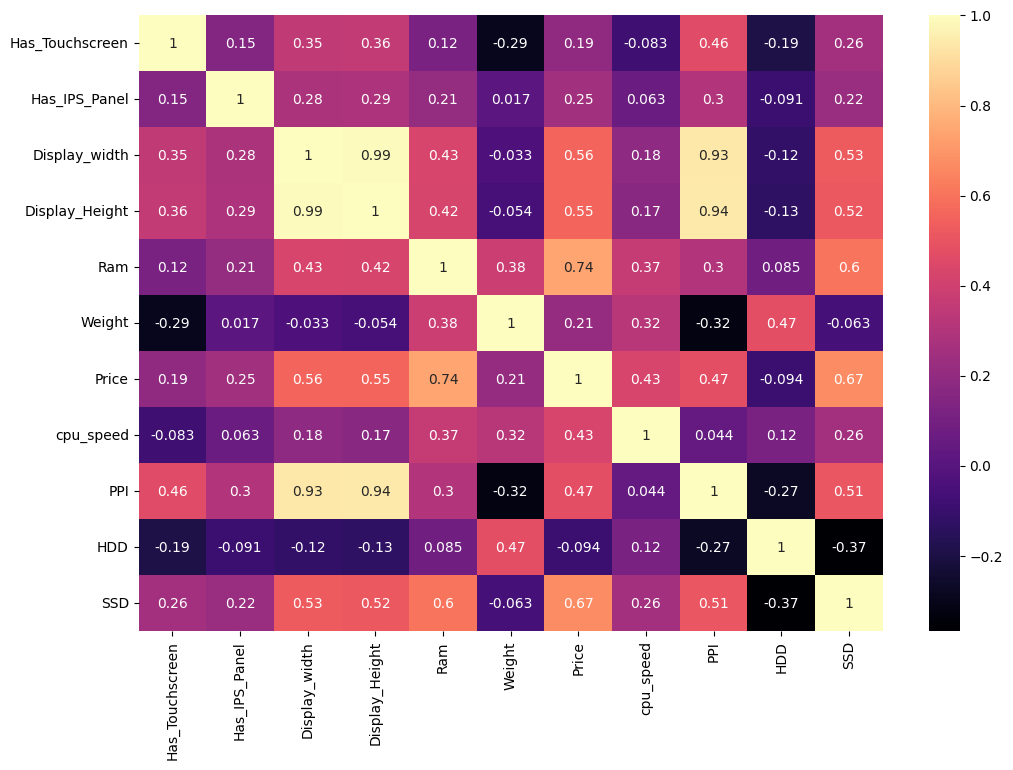

In [291]:
plt.figure(figsize=(12,8))
sns.heatmap(temp_df.corr(),annot=True,cmap='magma')